 Course Title: Predictive Analytics

 Course Code: MSIN0097
 
 Assignment No:1 Individual Assignment
 
 Title: Neural Networks for Predicting Obesity
 
 Word Count: 1978

# 1. Introduction
## 1.1 Background

Obesity has become a global health disaster in recent times, impacting millions of people globally and contributing to numerous related health problems like diabetes, cardiovascular diseases, and shortened life spans. Obesity has been identified by the World Health Organisation (WHO) as a major public health concern of the twenty-first century because of its effects on healthcare systems, societal well-being, and individual health in addition to its direct effects.

## 1.2 Framing the objective

Comprehending and forecasting the level of obesity is essential for immediate intervention and efficient development of health policies. Through the examination of multiple contributing factors, including genetic predispositions, physical activity, and eating habits, we can obtain important understanding of the intricate nature of obesity. With the use of an extensive dataset that includes a variety of characteristics that may be connected to obesity, this paper attempts to investigate the effectiveness of neural networks. This work aims to clarify the complex links between these factors and obesity by using a neural network. We want to see how well the model does on this dataset, the other models used in this paper are only there as comparative models.

# 2. Data Description

This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. It is important to note that 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df_obese = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df_obese.shape

(2111, 17)

In [4]:
df_obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

<Axes: xlabel='Age', ylabel='Count'>

<Axes: xlabel='Height', ylabel='Count'>

<Axes: xlabel='Weight', ylabel='Count'>

<Axes: xlabel='Gender', ylabel='count'>

<Axes: xlabel='Age', ylabel='Height'>

<Axes: xlabel='Age', ylabel='Weight'>

<Axes: xlabel='Gender', ylabel='Weight'>

<Axes: xlabel='Gender', ylabel='Height'>

<Axes: xlabel='Gender', ylabel='Weight'>

<Axes: xlabel='Gender', ylabel='Height'>

<Axes: xlabel='family_history_with_overweight', ylabel='Gender'>

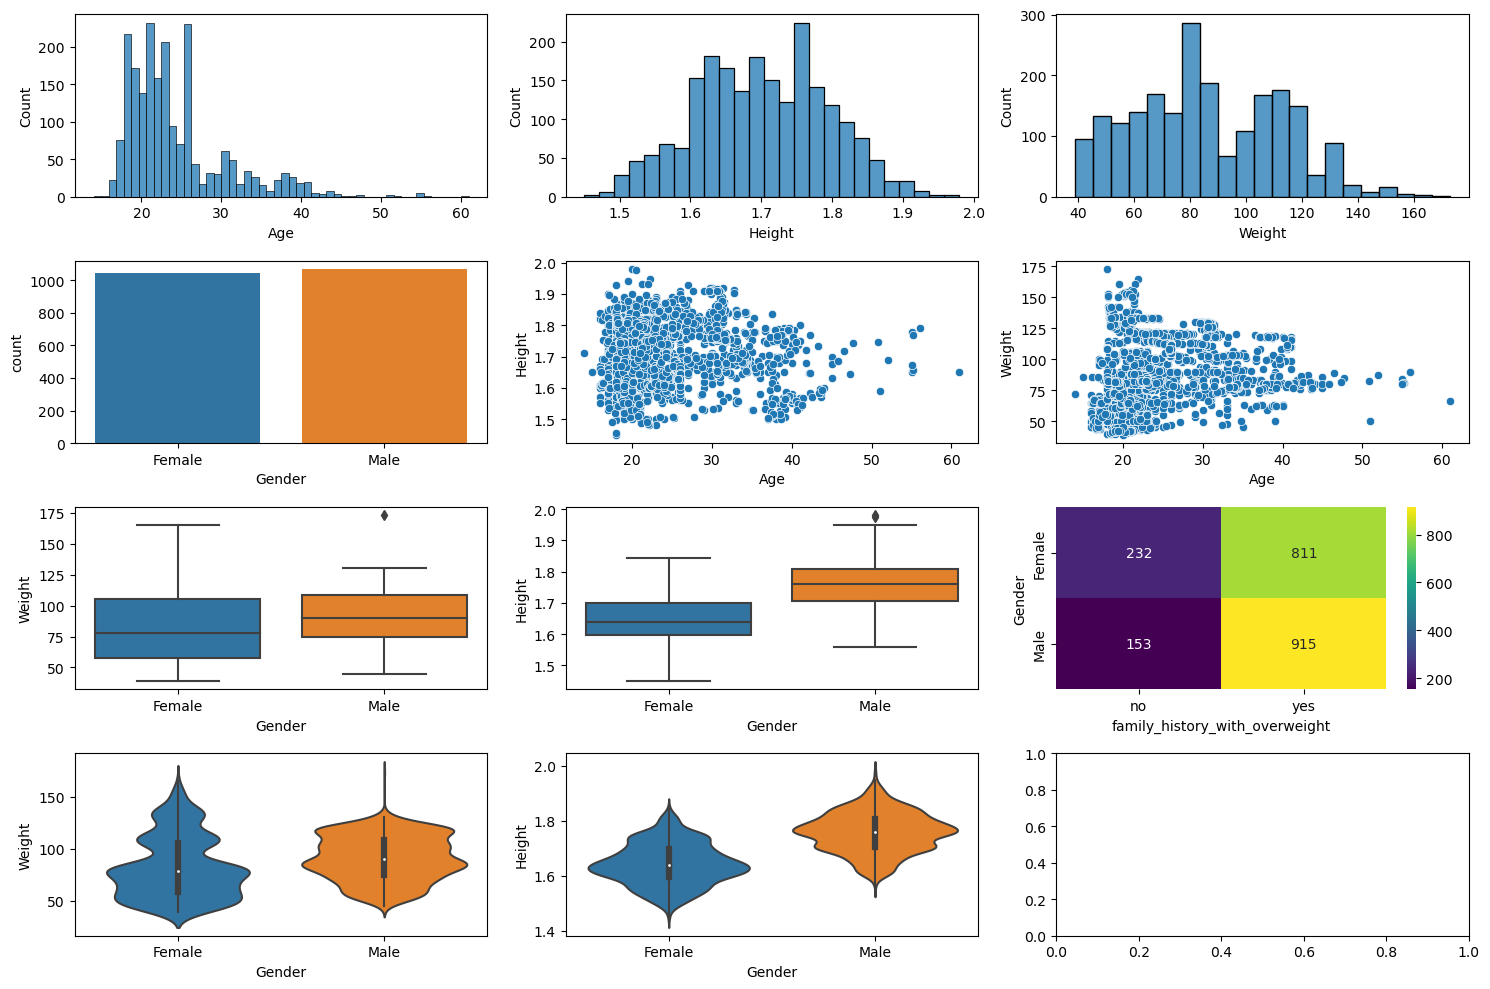

In [6]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Histograms/Distribution Plots
sns.histplot(df_obese['Age'], ax=axes[0, 0])
sns.histplot(df_obese['Height'], ax=axes[0, 1])
sns.histplot(df_obese['Weight'], ax=axes[0, 2])

# Count Plot
sns.countplot(x='Gender', data=df_obese, ax=axes[1, 0])

# Scatter Plots
sns.scatterplot(x='Age', y='Height', data=df_obese, ax=axes[1, 1])
sns.scatterplot(x='Age', y='Weight', data=df_obese, ax=axes[1, 2])

# Box Plots
sns.boxplot(x='Gender', y='Weight', data=df_obese, ax=axes[2, 0])
sns.boxplot(x='Gender', y='Height', data=df_obese, ax=axes[2, 1])

# Violin Plots
sns.violinplot(x='Gender', y='Weight', data=df_obese, ax=axes[3, 0])
sns.violinplot(x='Gender', y='Height', data=df_obese, ax=axes[3, 1])

# Heatmap for categorical comparison
# Since 'family_history_with_overweight' is binary, we will use it for comparison.
cat_num_heatmap_data = pd.crosstab(df_obese['Gender'], df_obese['family_history_with_overweight'])
sns.heatmap(cat_num_heatmap_data, annot=True, fmt='d', cmap='viridis', ax=axes[2, 2])

# Adjust subplots Layout
plt.tight_layout()


plt.show()

These visuals shed light on the dataset's demographics, the relationships between variables, and comparative distributions.

### 2.1 Explanation of each variable

In [7]:
# Defining the variables and their descriptions
variables_info = {
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Has a family member suffered or suffers from overweight?',
    'FAVC': 'Do you eat high caloric food frequently?',
    'FCVC': 'Do you usually eat vegetables in your meals?',
    'NCP': 'How many main meals do you have daily?',
    'CAEC': 'Do you eat any food between meals?',
    'SMOKE': 'Do you smoke?',
    'CH2O': 'How much water do you drink daily?',
    'SCC': 'Do you monitor the calories you eat daily?',
    'FAF': 'How often do you have physical activity?',
    'TUE': 'How much time do you use technological devices such as cell phone, videogames, television, computer and others?',
    'CALC': 'How often do you drink alcohol?',
    'MTRANS': 'Which transportation do you usually use?',
    'NObeyesdad': 'Obesity level'
}

# Function to print the variables and their descriptions
def print_variables(variables_info):
    for variable, description in variables_info.items():
        print(f"{variable}: {description}")

# Execute the function to print out the variables and descriptions
print_variables(variables_info)


Gender: Gender
Age: Age
Height: Height
Weight: Weight
family_history_with_overweight: Has a family member suffered or suffers from overweight?
FAVC: Do you eat high caloric food frequently?
FCVC: Do you usually eat vegetables in your meals?
NCP: How many main meals do you have daily?
CAEC: Do you eat any food between meals?
SMOKE: Do you smoke?
CH2O: How much water do you drink daily?
SCC: Do you monitor the calories you eat daily?
FAF: How often do you have physical activity?
TUE: How much time do you use technological devices such as cell phone, videogames, television, computer and others?
CALC: How often do you drink alcohol?
MTRANS: Which transportation do you usually use?
NObeyesdad: Obesity level


## 3 Explore The Data (EDA) 

The dataset's exploratory data analysis (EDA) is a crucial first step towards comprehending the complex interrelationship of factors linked to obesity. Through data analysis, we hope to understand the complicated relationships that exist between lifestyle decisions, dietary patterns, and demographic traits and how these factors together affect obesity rates. EDA will highlight patterns, identify anomalies, and bring the dataset's idiosyncrasies to light. It will also show what we need to do later on to help us clean and prepare the data.


## 3.1 Checking for duplicate values

In [8]:
#Find the duplicates
print(df_obese.duplicated().sum())

24


## 3.2 Checking for missing values

In [9]:
def check_missing_values(df):
    """
    Check for any missing values in the DataFrame.
    
    :param df: pandas.DataFrame
    :return: A DataFrame with the count of missing values for each column and a flag indicating the presence of missing values.
    """
    # Check for missing values
    missing_values = df.isnull().sum()
    missing_values_flag = df.isnull().any()
    
    # Combine the results into a DataFrame for a comprehensive overview
    missing_values_df = pd.DataFrame({
        'missing_count': missing_values,
        'has_missing': missing_values_flag
    })
    
    # Return the resulting DataFrame
    return missing_values_df

In [10]:
check_missing_values(df_obese)

,missing_count,has_missing
Gender,0,False
Age,0,False
Height,0,False
Weight,0,False
family_history_with_overweight,0,False
FAVC,0,False
FCVC,0,False
NCP,0,False
CAEC,0,False
SMOKE,0,False


## 3.2 Univariate Analysis of the data

This involves plotting histograms to understand the distribution of individual numerical variables. From this if needed we can calculate summary statistics (mean, median, mode, standard deviation, quartiles, and range). Then creating frequency tables for the other variables aswell as visualising with bar charts to understand the distribution of these categories.


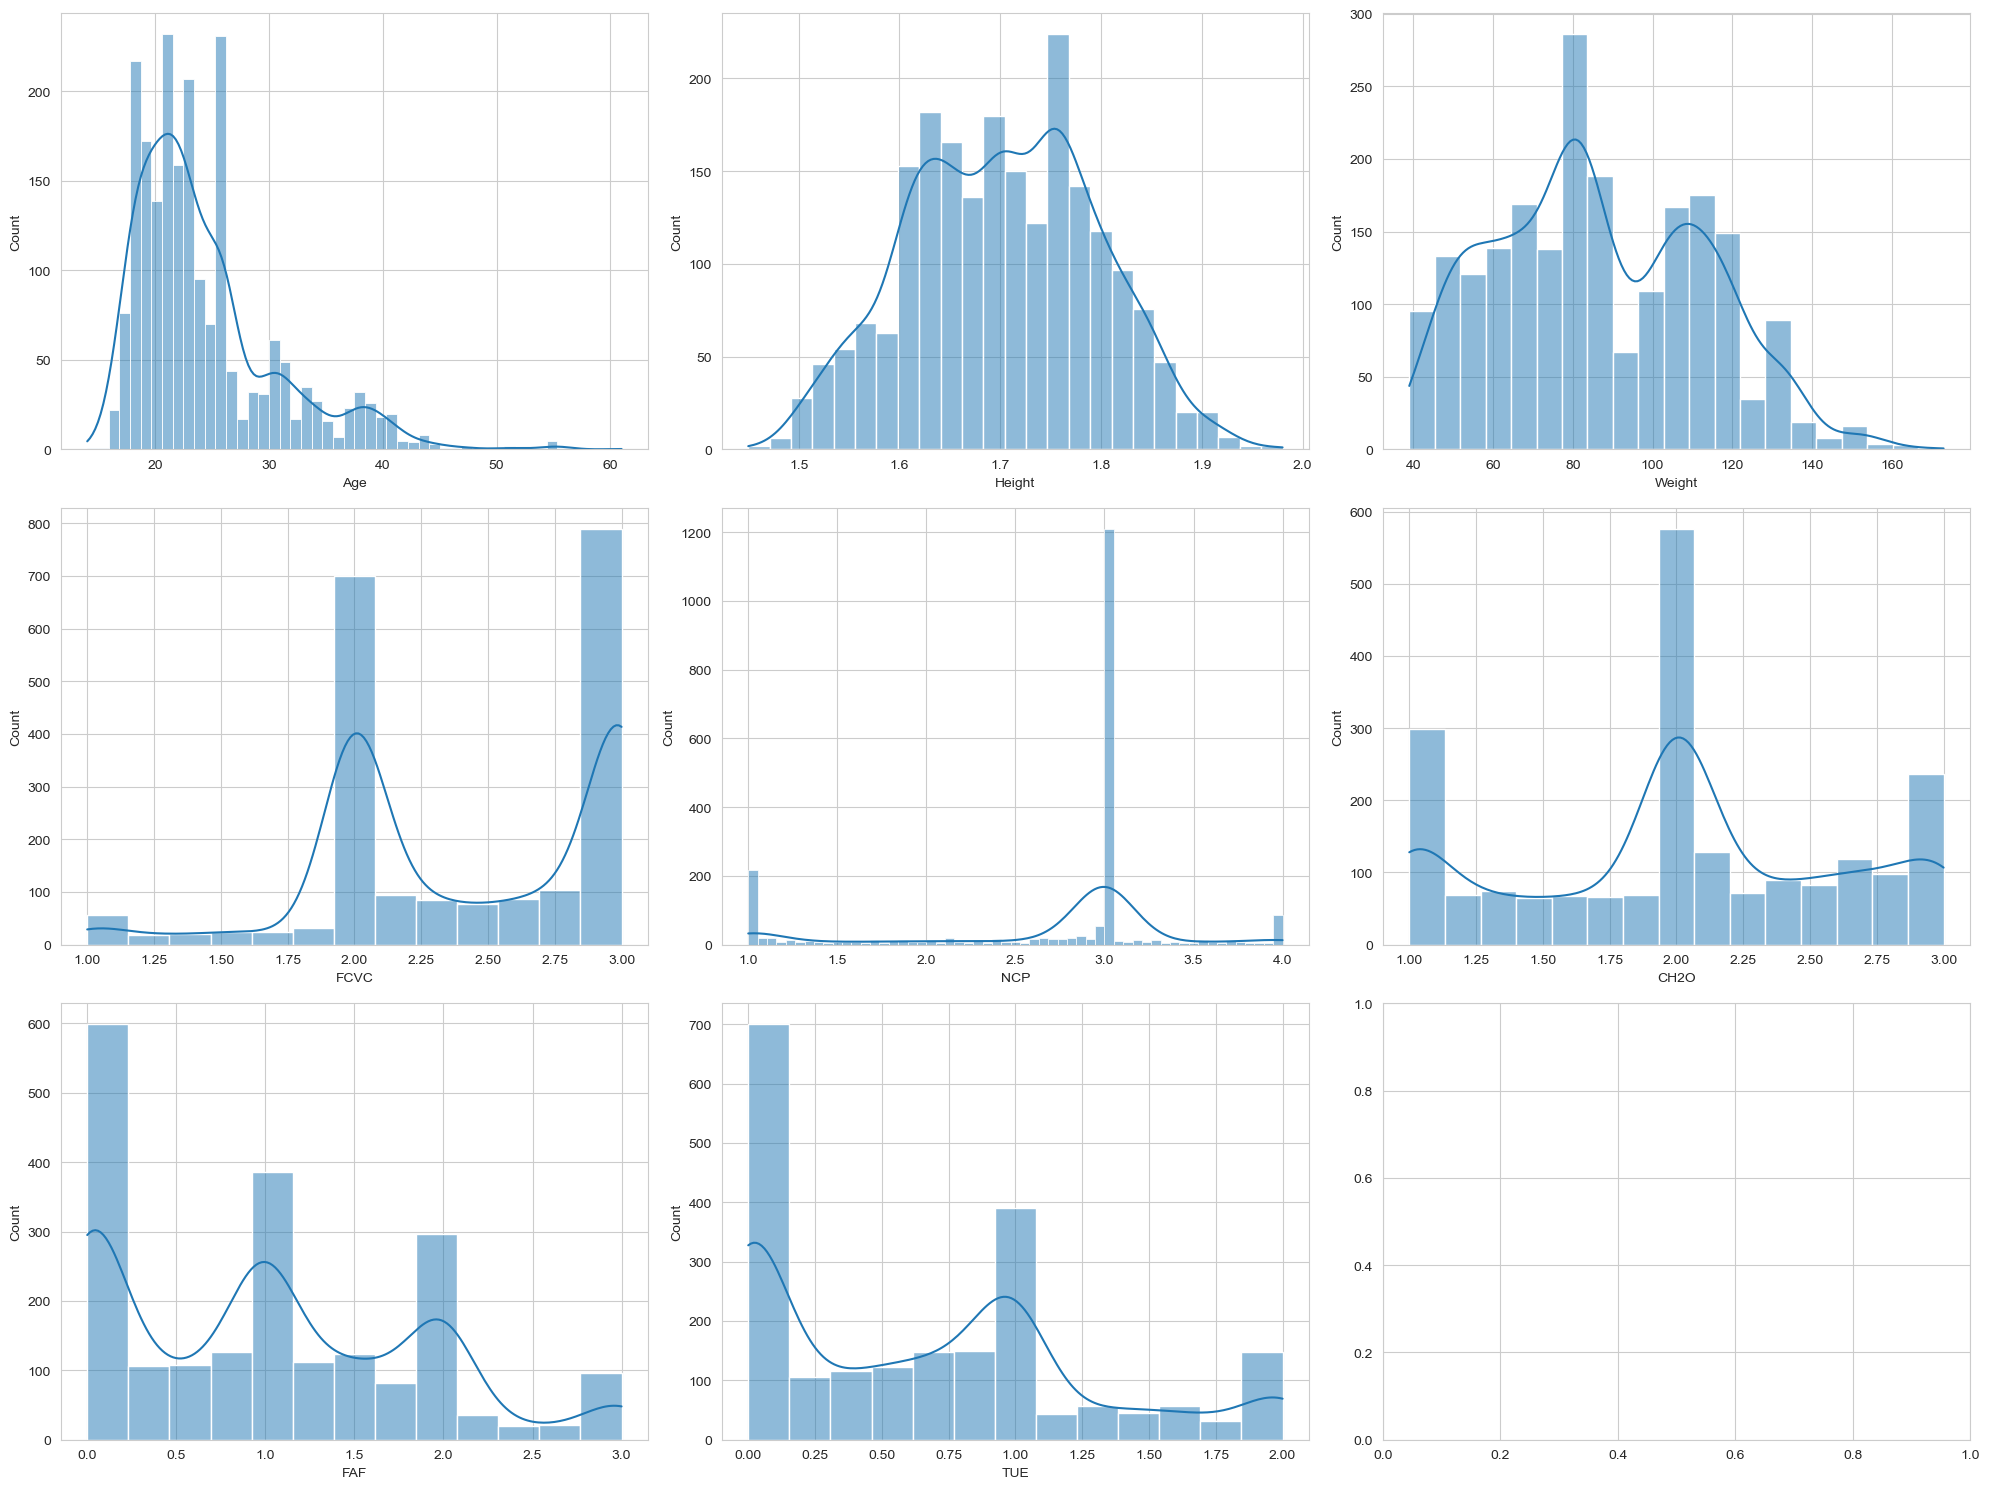

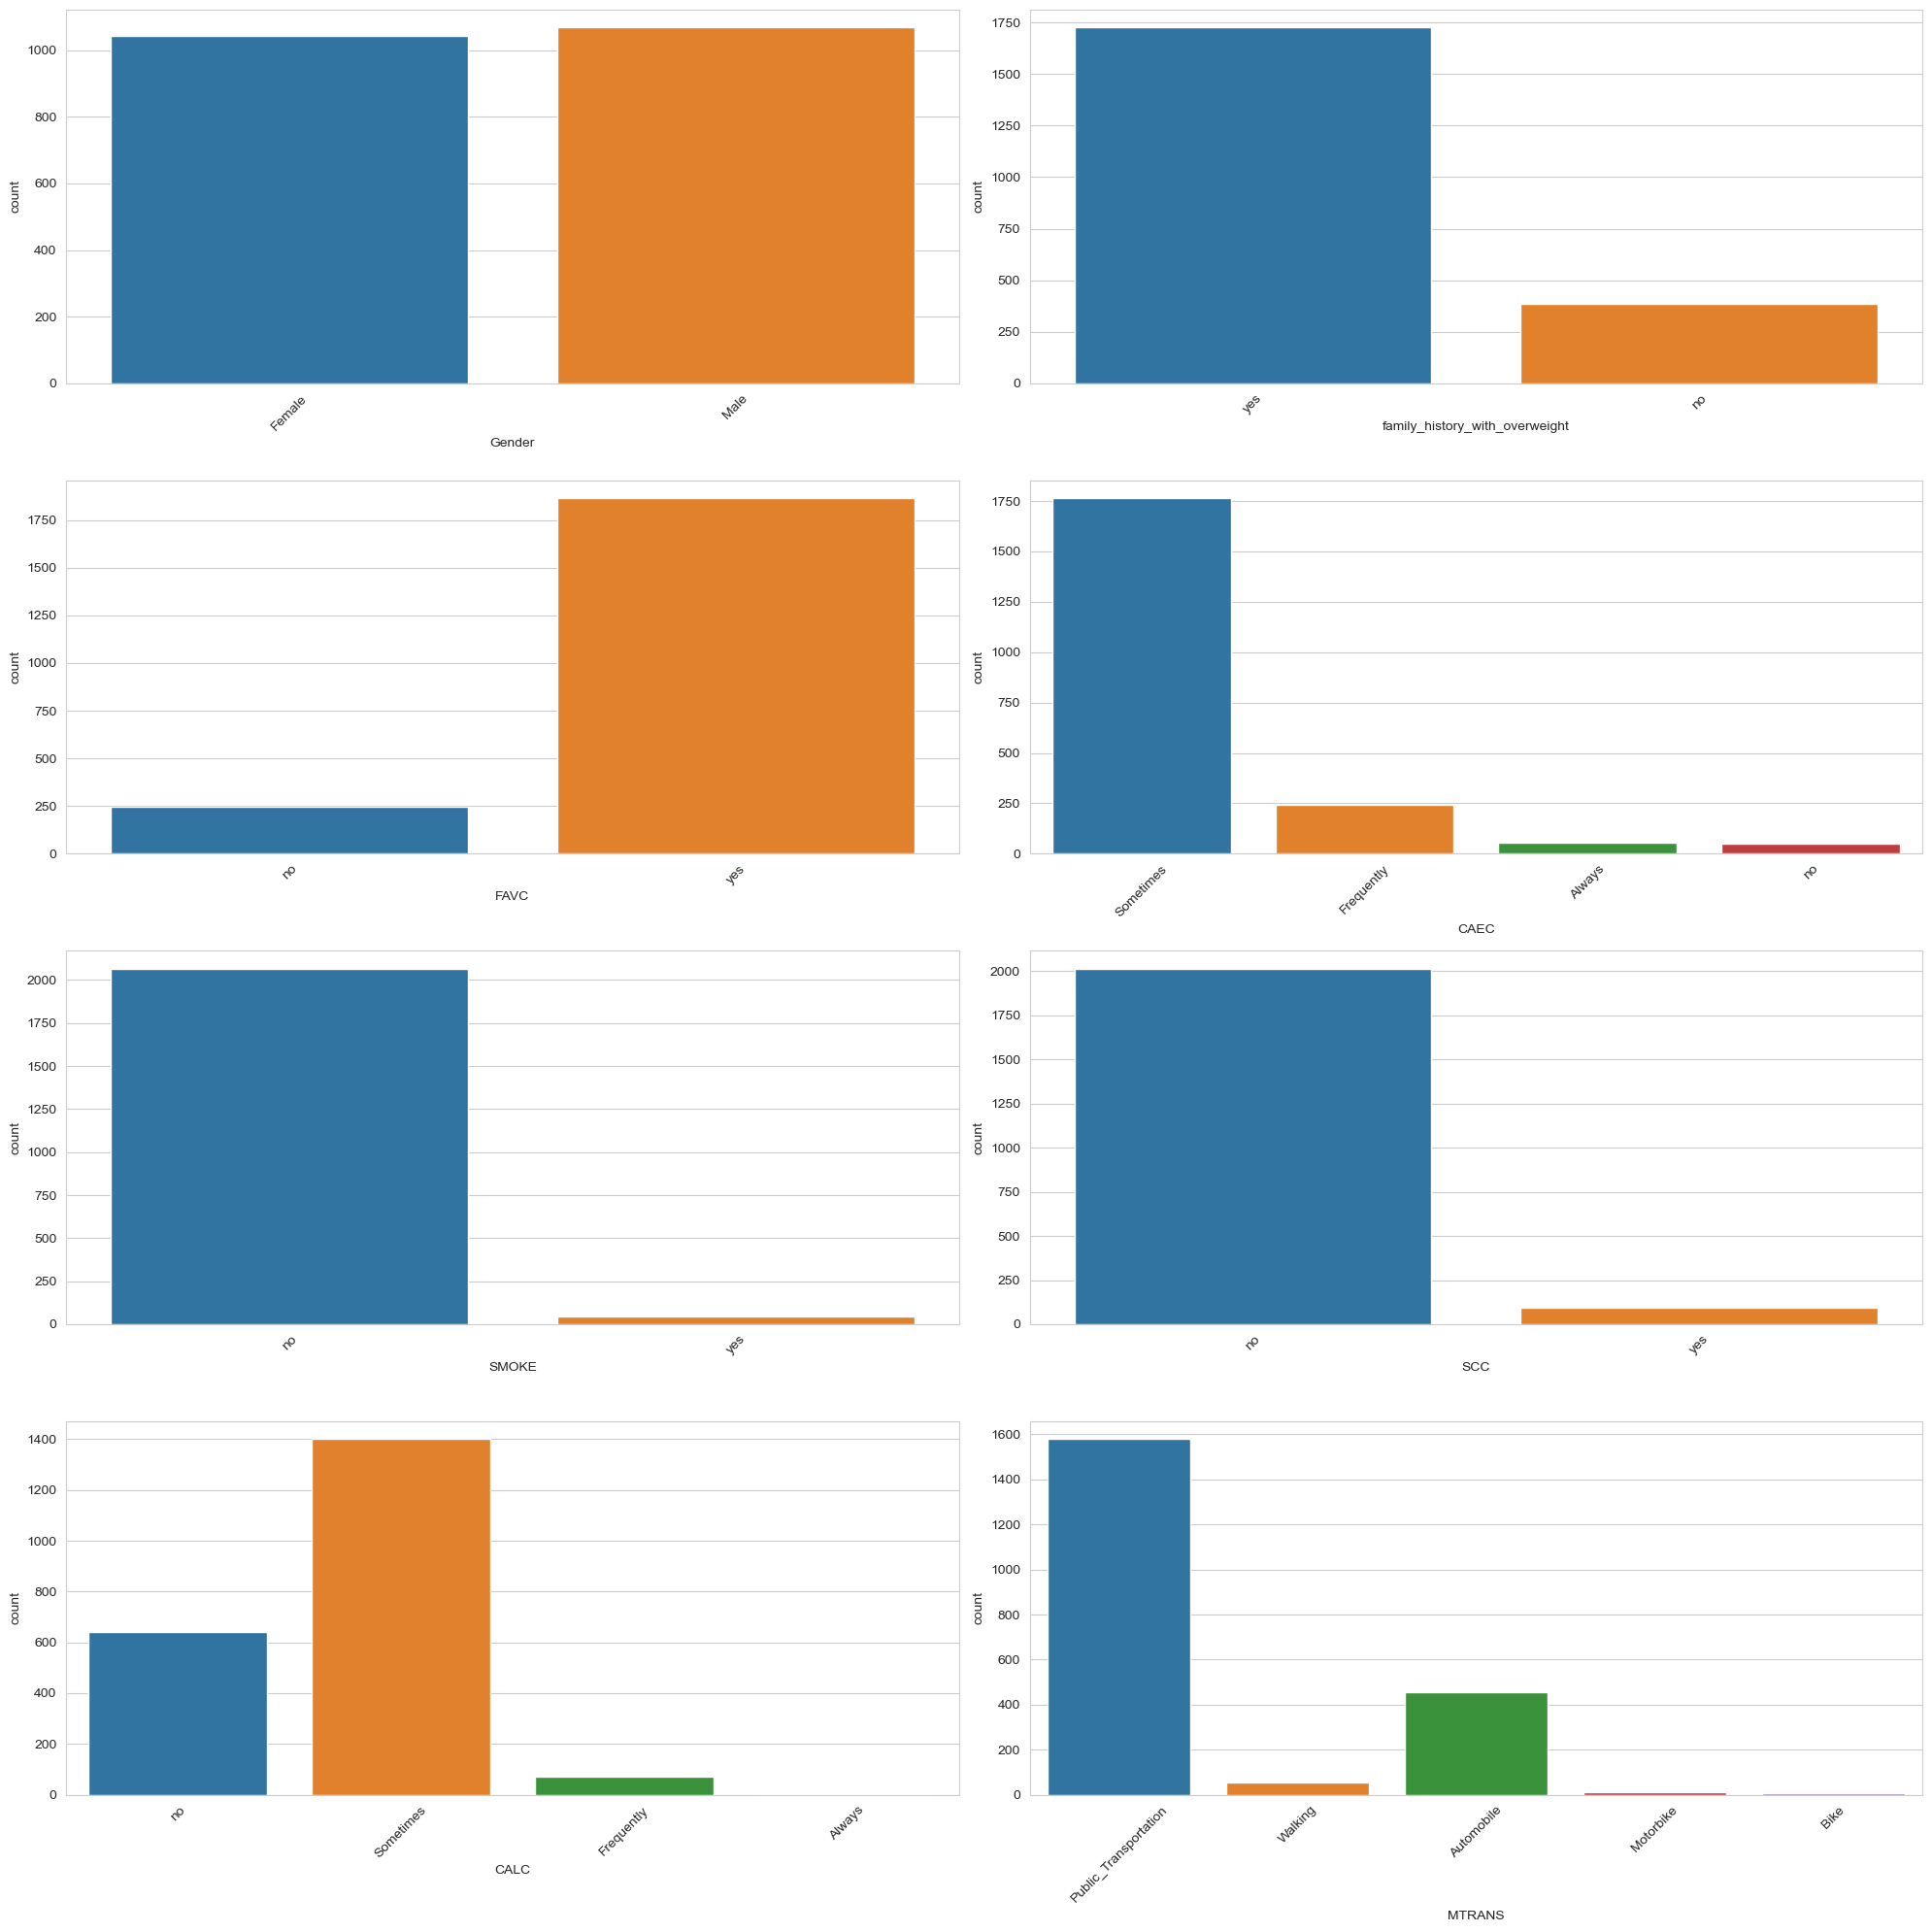

In [11]:
# Aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate Analysis of Numerical Features
def plot_numerical_features(df):
    fig, ax = plt.subplots(3, 3, figsize=(20, 15))
    numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df, x=feature, kde=True, ax=ax[i//3, i%3])
    plt.tight_layout()

# Univariate Analysis of Categorical Features
def plot_categorical_features(df):
    categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
    fig, ax = plt.subplots(4, 2, figsize=(20, 20))
    for i, feature in enumerate(categorical_features):
        sns.countplot(data=df, x=feature, ax=ax[i//2, i%2])
        ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45)
    plt.tight_layout()

# Plot numerical features
plot_numerical_features(df_obese)

# Plot categorical features
plot_categorical_features(df_obese)

# Show plots
plt.show()


These histograms suggest certain lifestyle patterns within the dataset, like a tendency towards a sedentary lifestyle with low physical activity, moderate water consumption, and varying eating habits with a tendency towards three main meals a day. The age and weight distributions hint at potential demographic and health trends in the population studied. 

These bar chart patterns suggest potential risk factors for obesity. For instance, high consumption of high-caloric food and low levels of monitoring calorie intake could contribute to higher obesity rates. The predominance of public transportation usage over walking might also correlate with lower physical activity levels. However,it is important to note that these charts don't provide information about the direct correlation of these factors with obesity; they only illustrate certain behaviors and characteristics in the population.

## 3.3 Bivariate Analysis

Creating a correlation heatmap for numerical features. This helps us see the relationships betweem each variable and see the strength of each relationship. Create boxplots to see the distribution of numerical features across different categories of the target variable 'NObeyesdad'.

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap for Numerical Features')

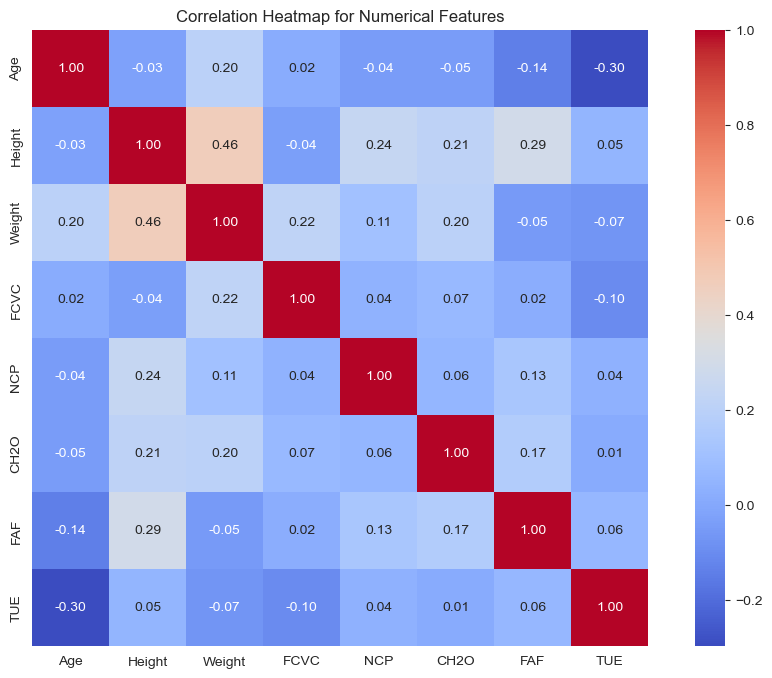

In [12]:
# Select only the numerical features for correlation
numerical_data = df_obese.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features only
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


Let's look at some key correlations:

Age and TUE: There's a moderate negative correlation (-0.30), suggesting that younger individuals tend to use technology more.

Height and Weight: There's a moderate positive correlation (0.46), which is expected as taller individuals tend to weigh more.

Weight and FCVC: There's a positive correlation (0.22), which may seem counterintuitive as vegetable consumption is generally associated with weight management. However, this could be due to other confounding factors or indicate that individuals who are heavier are trying to consume more vegetables.

In [1]:
# For numerical-categorical relationships
def plot_numerical_categorical(data, num_features, cat_feature):
    for num_feature in num_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat_feature, y=num_feature, data=data)
        plt.xticks(rotation=45)
        plt.show()

# Call the function with the numerical and categorical features

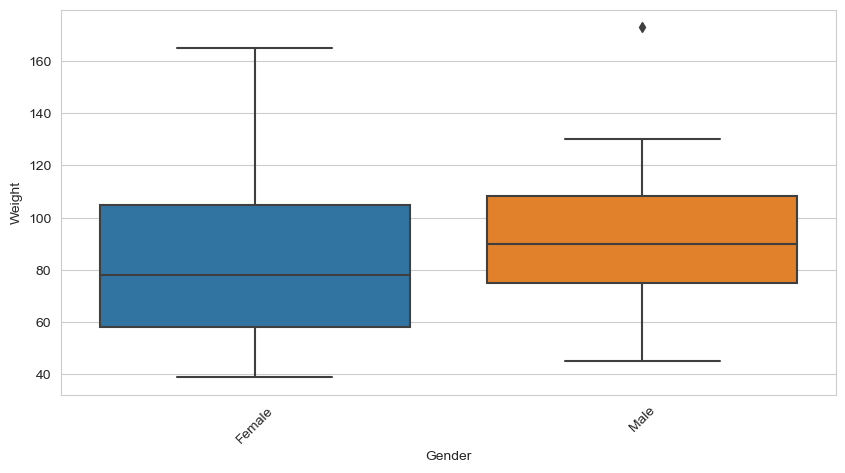

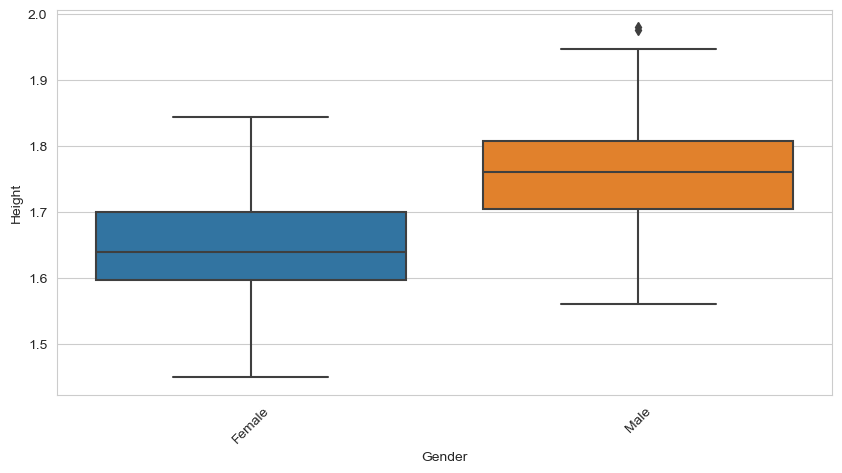

In [14]:
plot_numerical_categorical(df_obese, ['Weight', 'Height'], 'Gender')

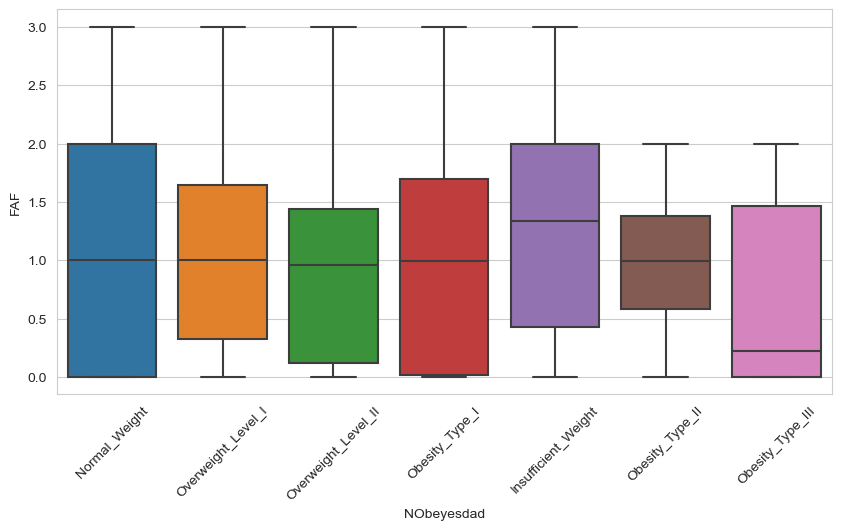

In [15]:
plot_numerical_categorical(df_obese, ['FAF'], 'NObeyesdad')

There does not seem to be a strong trend in physical activity levels across the different categories of obesity. The medians are fairly consistent, although there's a slight increase in median for 'Insufficient Weight'. The 'Obesity Type 3' category has a significantly lower median than the overweight and the other obese categories. Still, factors other than physical activity frequency might also play significant roles in these weight categories.

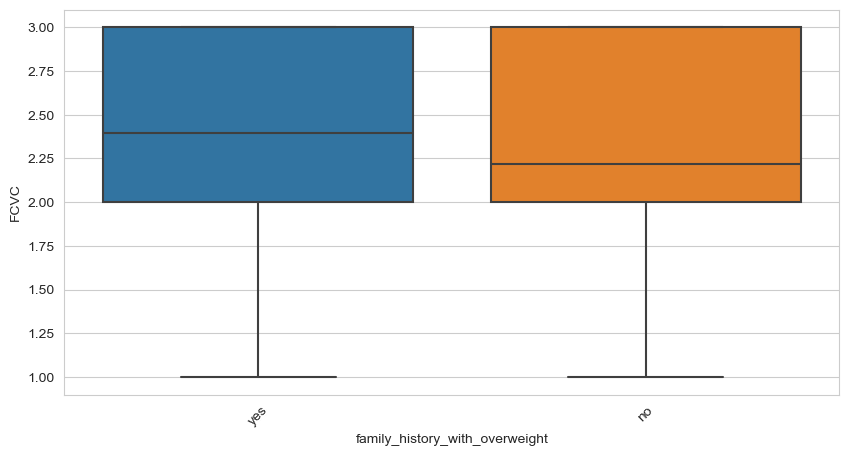

In [16]:
plot_numerical_categorical(df_obese, ['FCVC'], 'family_history_with_overweight')

Both groups appear to consume vegetables at a high frequency, with those with a family history showing slightly higher vegetable consumption. There's a significant amount of variability within both groups. This implies that families with history of overweight tend to eat more vegetables and this could be due to fear of becoming overweight or they are already overweight and want to eat more vegetables.

## 3.4 Checking for outliers

I created boxplots for all of the variables as this would help me visualise if there are any outliers and potentially get a feel on where they are. I then used Z-scores to measures how many standard deviations an element is from the mean. Then looking at IQR for outliers as well. Then finally finding the common values that they have.

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Age'>

Text(0.5, 1.0, 'Age')

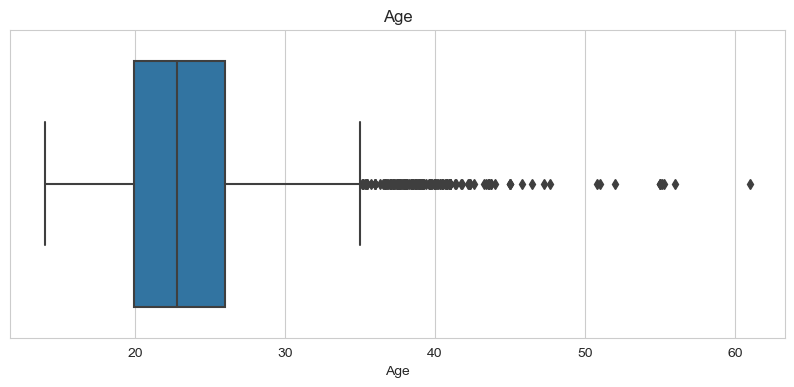

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Height'>

Text(0.5, 1.0, 'Height')

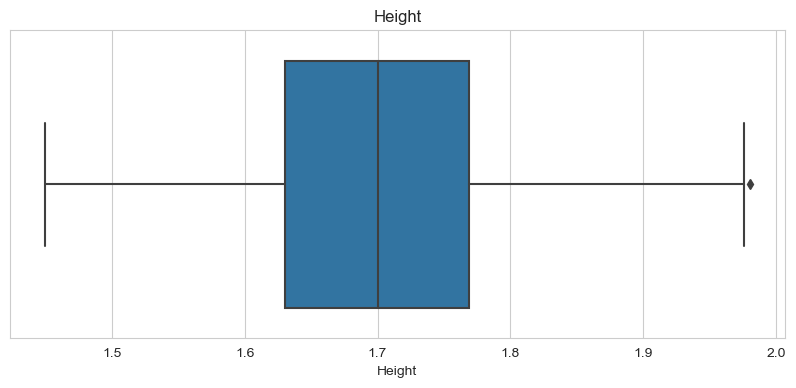

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Weight'>

Text(0.5, 1.0, 'Weight')

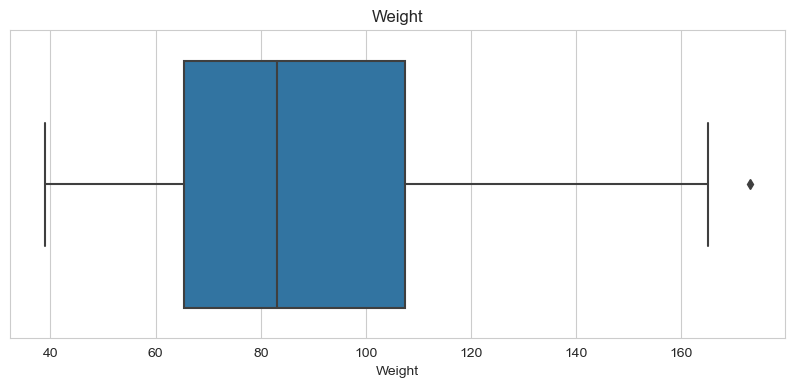

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='FCVC'>

Text(0.5, 1.0, 'FCVC')

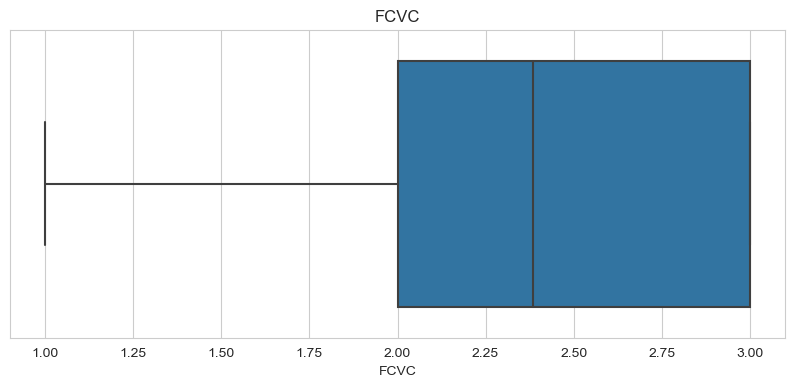

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='NCP'>

Text(0.5, 1.0, 'NCP')

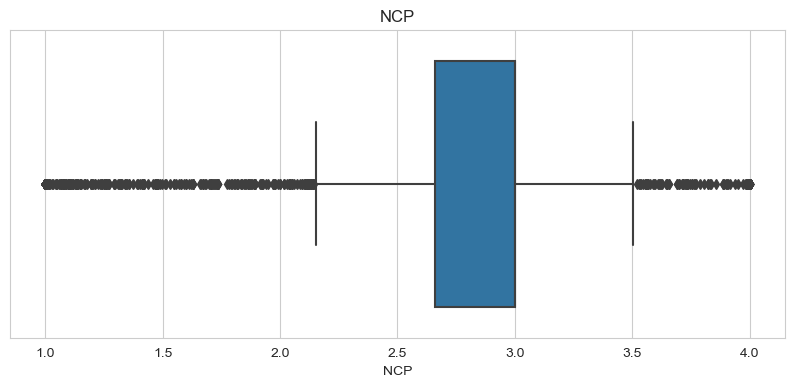

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='CH2O'>

Text(0.5, 1.0, 'CH2O')

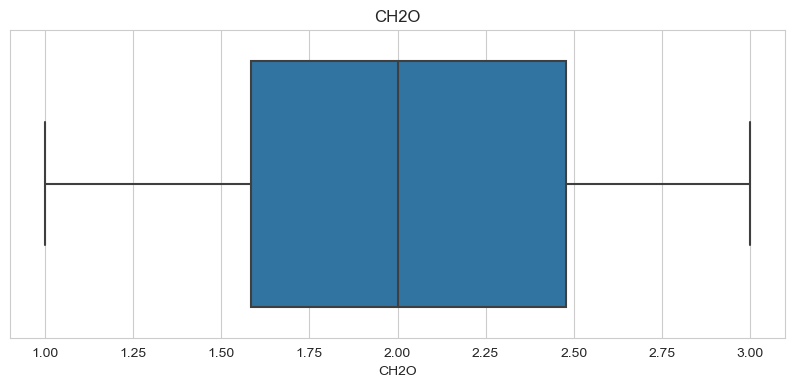

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='FAF'>

Text(0.5, 1.0, 'FAF')

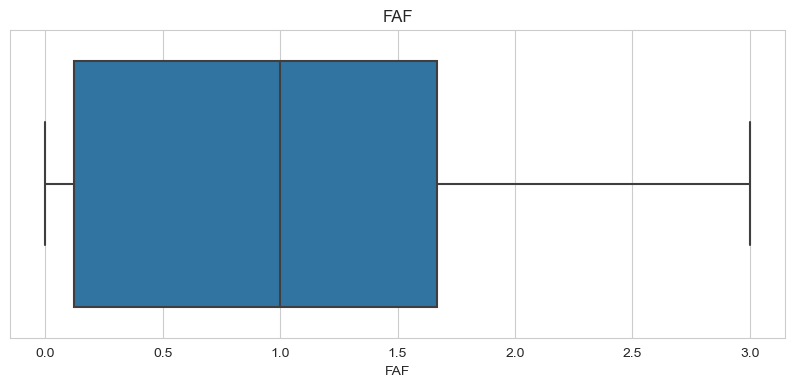

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='TUE'>

Text(0.5, 1.0, 'TUE')

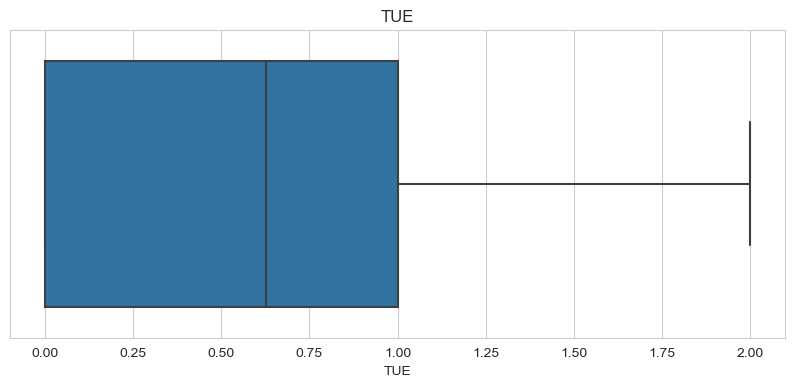

In [17]:
# Plot boxplots for all numerical features
numerical_data = df_obese.select_dtypes(include=['float64', 'int64'])
for column in numerical_data.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=numerical_data[column])
    plt.title(column)
    plt.show()

In [18]:
# Select only numerical columns from DataFrame
numerical_df = df_obese.select_dtypes(include=[np.number])

# Calculate the z-scores for the numerical columns only
z_scores = np.abs(stats.zscore(numerical_df))

# Set a threshold for identifying outliers
threshold = 3

# Get boolean array where true indicates the presence of an outlier
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame for outliers
outlier_data = df_obese[outliers]


In [19]:
outlier_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_I
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,Female,61.000000,1.650000,66.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Normal_Weight
137,Male,44.000000,1.600000,80.000000,yes,no,2.000000,3.000000,Sometimes,yes,3.000000,no,0.000000,0.0,no,Motorbike,Obesity_Type_I
161,Male,55.000000,1.650000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
169,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
232,Female,51.000000,1.590000,50.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,2.000000,0.0,no,Public_Transportation,Normal_Weight
252,Male,56.000000,1.790000,90.000000,yes,no,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II
344,Male,18.000000,1.870000,173.000000,yes,yes,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_III
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II


In [20]:
# Define a function to find outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = []
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))
        outliers.append(data[outlier_condition])
    return pd.concat(outliers)

outliers_df = detect_outliers_iqr(numerical_data)

In [21]:
outliers_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
13,41.000000,1.800000,99.000000,2.000000,3.000000,2.000000,2.000000,1.000000
21,52.000000,1.690000,87.000000,3.000000,1.000000,2.000000,0.000000,0.000000
33,39.000000,1.790000,90.000000,2.000000,1.000000,2.000000,0.000000,0.000000
92,55.000000,1.780000,84.000000,3.000000,4.000000,3.000000,3.000000,0.000000
104,38.000000,1.560000,80.000000,2.000000,3.000000,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1794,30.642430,1.653876,102.583895,2.919526,2.142328,1.175714,0.958555,0.636289
1795,20.068432,1.657132,105.580491,2.724121,1.437959,1.590418,0.029603,1.122118
1796,20.914366,1.644751,101.067988,2.801992,1.343117,1.128942,0.233987,0.819980
1797,25.512048,1.660761,104.321463,2.748971,1.213431,1.448875,0.128548,1.239038


In [22]:
outlier_data = (np.abs(stats.zscore(numerical_df)) > 3).any(axis=1)

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
outliers_df = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Find the common outliers
common_outliers_mask = outlier_data & outliers_df

# Filter the DataFrame to get the common outliers
common_outliers = df_obese[common_outliers_mask]

# Print the common outliers
common_outliers


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_I
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,Female,61.000000,1.650000,66.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Normal_Weight
137,Male,44.000000,1.600000,80.000000,yes,no,2.000000,3.000000,Sometimes,yes,3.000000,no,0.000000,0.0,no,Motorbike,Obesity_Type_I
161,Male,55.000000,1.650000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
169,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
232,Female,51.000000,1.590000,50.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,2.000000,0.0,no,Public_Transportation,Normal_Weight
252,Male,56.000000,1.790000,90.000000,yes,no,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II
344,Male,18.000000,1.870000,173.000000,yes,yes,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_III
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II


After looking at the outlier data I have found that there are many outliers and knowing this, I have decided to keep the outliers in the dataset. This is because outliers can represent natural variation in the data. In many cases, especially with human-related data like heights, weights, or medical measurements, outliers may simply represent the extremes of normal distribution. Also, some outliers might contain important information.

# 4. DATA CLEANING

A useful analysis of machine learning project must first ensure the quality and integrity of the dataset. Often, unprocessed datasets contain errors, missing values, or unusual data points that might distort outcomes and jeopardise the effectiveness of the model. Machine learning models' efficacy and accuracy can be greatly increased by cleaning the data. As a result of the EDA that took place before, we know places where to start in cleaning this dataset.


## 4.1 Getting rid of duplicates

In [23]:
df_obese = df_obese.drop_duplicates()

In [24]:
print(df_obese.duplicated().sum())

0


In [25]:
df_obese.shape

(2087, 17)

In [26]:
 df_obese_cleaned = df_obese.copy()

## 4.2 Encoding

One-hot encoding transforms categorical variables into a format that can be provided to machine learning algorithms to better predict the target variable. It is important to note that the target variable 'NObeyesdad' is also a categorical variables so this was also one hot encoded leaving us now with a multi-classifiction class.

In [27]:
categorical_features = df_obese_cleaned.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_categorical = encoder.fit_transform(df_obese_cleaned[categorical_features])

# Create a DataFrame with encoded data and column names
encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_features),
                                      index=df_obese_cleaned.index)

# Drop original categorical columns and concatenate the encoded columns
df_obese_cleaned = df_obese_cleaned.drop(categorical_features, axis=1)
df_obese_cleaned = pd.concat([df_obese_cleaned, encoded_categorical_df], axis=1)

C:\Users\samue\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df_obese_cleaned.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
df_obese_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   float64
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   float64
 4   NCP                                 2087 non-null   float64
 5   CH2O                                2087 non-null   float64
 6   FAF                                 2087 non-null   float64
 7   TUE                                 2087 non-null   float64
 8   Gender_Female                       2087 non-null   float64
 9   Gender_Male                         2087 non-null   float64
 10  family_history_with_overweight_no   2087 non-null   float64
 11  family_history_with_overweight_yes  2087 non-nul

In [30]:
df_obese_cleaned.shape

(2087, 38)

In [32]:
## df_obese_cleaned.to_csv('df_obese_cleaned.csv', index=False)

# 5. Building Models

Our investigation into the dataset uses three predictive models: decision trees, random forest, and a sequential TensorFlow neural network, with the latter positioned as our primary focus. The neural network's advanced deep learning capabilities are expected to excel in modeling the complex patterns associated with obesity. Decision trees will provide transparent insight into the data's features, and the random forest will seek to enhance prediction through an ensemble approach. This comparative model analysis will underpin our efforts to accurately classify obesity levels, highlighting the efficacy of each model in a structured, report-like assessment. Our main aim is to use the two other models to compare and see how the neural network does relatively.

Hyperparameter optimisation can be used to fine-tune both decision tree and random forest models to increase performance. In hyperparameter tuning, the optimal model performance is achieved by combining parameters using a search method. Grid Search is a popular technique in which a grid of possible hyperparameter combinations is defined, and cross-validation is used to train and assess the model for each combination. This process results in more accurate and robust models that we can compare the neural network model to.


## 5.1 Splitting the data

Splitting the data into training and testing sets is fundamental to evaluating the generalisability of a machine learning model. The training set is used to build and tune the model, while the testing set is crucial for assessing its performance on previously unseen data, ensuring that our model predictions are robust and reliable.

In [33]:
target_columns = [
    'NObeyesdad_Insufficient_Weight',
    'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I',
    'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III',
    'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II'
]
features = df_obese_cleaned.drop(target_columns, axis=1)
targets = df_obese_cleaned[target_columns]

# Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

## 5.2 Decision Tree

In [34]:
# Initialize Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict the classes on test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print("Accuracy:", accuracy_tree)
print("Classification Report:\n", classification_rep_tree)

DecisionTreeClassifier()

Accuracy: 0.9258373205741627
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        59
           1       0.88      0.72      0.79        61
           2       0.94      0.96      0.95        70
           3       1.00      0.98      0.99        64
           4       0.98      1.00      0.99        60
           5       0.82      0.89      0.85        55
           6       0.94      0.96      0.95        49

   micro avg       0.93      0.93      0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.92       418
 samples avg       0.93      0.93      0.93       418



In [35]:
#Hyperparameter tune the tree

# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Predict the classes on test data using the best model
y_pred_best_tree = best_tree_model.predict(X_test)

# Evaluate the classifier
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
classification_rep_best_tree = classification_report(y_test, y_pred_best_tree)

print("Accuracy:", accuracy_best_tree)
print("Classification Report:\n", classification_rep_best_tree)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9401913875598086
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.84      0.84      0.84        61
           2       0.97      1.00      0.99        70
           3       1.00      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.90      0.82      0.86        55
           6       0.94      1.00      0.97        49

   micro avg       0.94      0.94      0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418
 samples avg       0.94      0.94      0.94       418



## 5.3 RandomForest

In [36]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rf)
classification_rep_rfc = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rfc)
print("Classification Report:\n", classification_rep_rfc)


RandomForestClassifier(random_state=42)

Accuracy: 0.8660287081339713
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        59
           1       0.81      0.57      0.67        61
           2       1.00      0.94      0.97        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.96      0.80      0.87        55
           6       0.95      0.86      0.90        49

   micro avg       0.97      0.87      0.91       418
   macro avg       0.96      0.86      0.91       418
weighted avg       0.96      0.87      0.91       418
 samples avg       0.87      0.87      0.87       418



C:\Users\samue\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Hyperparameter the random forest

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict the classes on test data using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the classifier
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rf)
classification_rep_best_rfc = classification_report(y_test, y_pred_best_rf)

print("Accuracy:", accuracy_best_rfc)
print("Classification Report:\n", classification_rep_best_rfc)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.868421052631579
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        59
           1       0.85      0.57      0.69        61
           2       1.00      0.94      0.97        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.98      0.78      0.87        55
           6       0.96      0.90      0.93        49

   micro avg       0.98      0.87      0.92       418
   macro avg       0.97      0.87      0.91       418
weighted avg       0.97      0.87      0.91       418
 samples avg       0.87      0.87      0.87       418



C:\Users\samue\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.4 Neural Network

Initially, a basic neural network model will be constructed, followed by an improved version incorporating regularisation techniques to enhance performance.  The two neural network models will be developed using TensorFlow's Keras API showcase basic and advanced configurations.

In [39]:
# Number of features in training data
n_features = X_train.shape[1]

# Number of unique classes in the target variable
n_classes = y_train.shape[1]  # This assumes y_train is one-hot encoded

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(n_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

C:\Users\samue\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,807 (50.03 KB)

 Trainable params: 12,807 (50.03 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#Building the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1869 - loss: 7.2818 - val_accuracy: 0.2344 - val_loss: 1.7349
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3522 - loss: 1.5883 - val_accuracy: 0.4019 - val_loss: 1.4837
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3782 - loss: 1.4608 - val_accuracy: 0.3565 - val_loss: 1.5623
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4031 - loss: 1.4187 - val_accuracy: 0.5096 - val_loss: 1.1898
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4984 - loss: 1.2540 - val_accuracy: 0.5694 - val_loss: 1.1206
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5559 - loss: 1.1310 - val_accuracy: 0.5120 - val_loss: 1.2788
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 1.0767 - val_accuracy: 0.6292 - val_loss: 0.9631
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6119 - loss: 0.9768 - val_accuracy: 0.6053 - 

In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test loss and test accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.3862992823123932
Test Accuracy: 0.8516746163368225


The initial model was constructed using TensorFlow's Keras. It comprises two hidden layers with 128 and 64 neurons, respectively, employing the ReLU activation function. The model is then compiled with the Adam optimizer and categorical cross-entropy loss function. The Adam optimizer is an adaptive learning rate optimization algorithm designed specifically for training deep neural networks. The categorical cross-entropy loss function is suitable for multi-class classification problems where each example is assigned to exactly one class. The test loss of approximately 0.4 suggests how well the model is at minimizing the error in its predictions; the lower the loss, the better the model's predictions match the true values. The test accuracy score of 85% is fairly good, however there is still room for improvement.

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

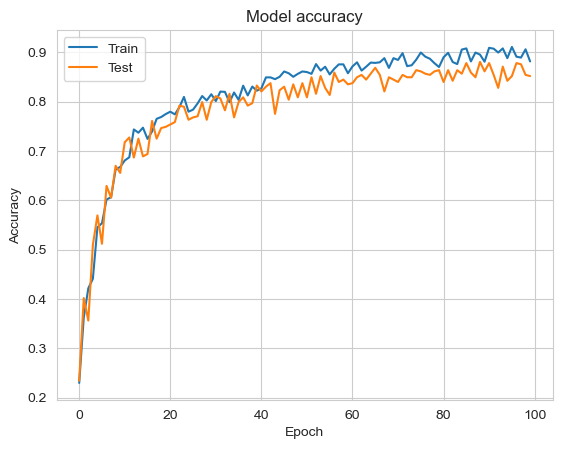

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

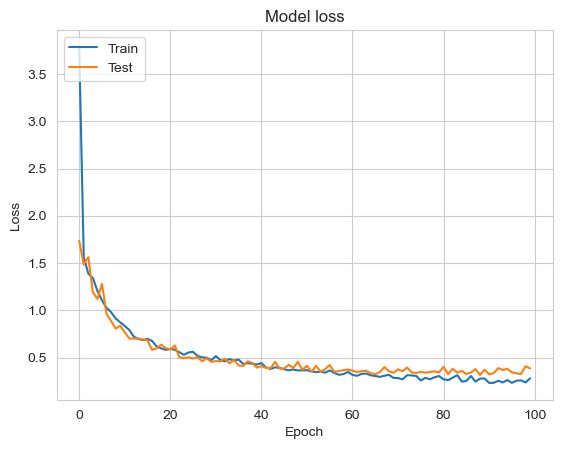

In [43]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## 5.6 Trying to improve the Neural Network Model

In [44]:
X = df_obese_cleaned.iloc[:, :-7].values
y = df_obese_cleaned.iloc[:, -7:].values

# Normalize your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
n_classes = y_train.shape[1]

# Building the neural network
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))  # n_classes here will be 7 as per the one-hot encoding

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

C:\Users\samue\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2579 - loss: 2.2439 - val_accuracy: 0.5808 - val_loss: 1.3909
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5218 - loss: 1.3101 - val_accuracy: 0.7036 - val_loss: 1.1657
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5844 - loss: 1.1483 - val_accuracy: 0.7246 - val_loss: 0.9977
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.9796 - val_accuracy: 0.7365 - val_loss: 0.8797
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6533 - loss: 0.9399 - val_accuracy: 0.7635 - val_loss: 0.7970
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6914 - loss: 0.8440 - val_accuracy: 0.7725 - val_loss: 0.7120
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7062 - loss: 0.8093 - val_accuracy: 0.7904 - val_loss: 0.6544
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7077 - loss: 0.7543 - val_accuracy: 0.8204 - 

In [45]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)#

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.21685831248760223
Test Accuracy: 0.9234449863433838


The second, improved model adds L2 regularisation to control the weight values and Batch Normalisation and Dropout to lessen overfitting and promote generalisation.The test accuracy of around 92% and test loss of approximately 0.21 are obtained from the performance of the enhanced neural network model. We can see that improvements like Batch Normalisation, Dropout, and L2 regularisation have successfully addressed problems like internal covariate shift and overfitting in the upgraded model compared to the original, resulting in a more durable and dependable neural network.

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

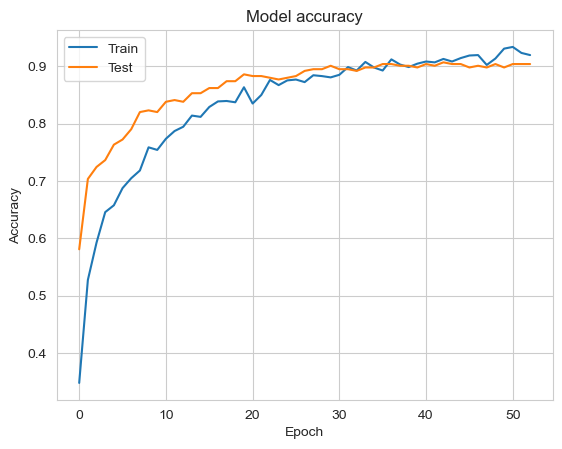

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

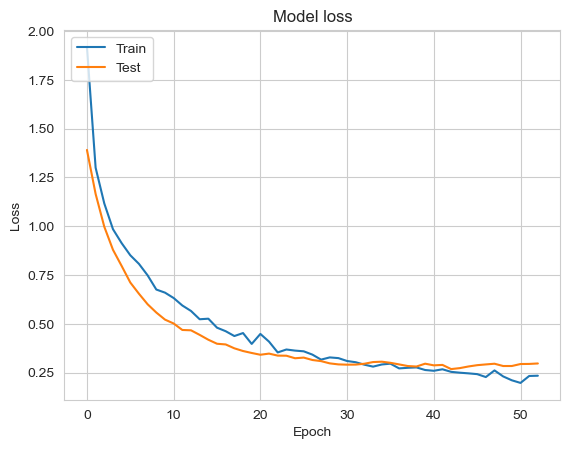

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Comparing and Evaluating models

<Figure size 1400x800 with 0 Axes>

Text(0.0, 0.92, '0.92')

Text(1.0, 0.94, '0.94')

Text(2.0, 0.86, '0.86')

Text(3.0, 0.86, '0.86')

Text(4.0, 0.85, '0.85')

Text(5.0, 0.92, '0.92')

Text(0.2, 0.93, '0.93')

Text(1.2, 0.94, '0.94')

Text(2.2, 0.96, '0.96')

Text(3.2, 0.97, '0.97')

Text(4.2, nan, 'nan')

Text(5.2, nan, 'nan')

Text(0.4, 0.93, '0.93')

Text(1.4, 0.94, '0.94')

Text(2.4000000000000004, 0.87, '0.87')

Text(3.4000000000000004, 0.87, '0.87')

Text(4.4, nan, 'nan')

Text(5.4, nan, 'nan')

Text(0.6000000000000001, 0.92, '0.92')

Text(1.6, 0.94, '0.94')

Text(2.6000000000000005, 0.91, '0.91')

Text(3.6000000000000005, 0.91, '0.91')

Text(4.6000000000000005, nan, 'nan')

Text(5.6000000000000005, nan, 'nan')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Comparison of Model Metrics')

([<matplotlib.axis.XTick at 0x2c2f9fac850>,
 [Text(0.2, 0, 'Decision Tree'),
  Text(1.2, 0, 'Tuned Decision Tree'),
  Text(2.2, 0, 'Random Forest'),
  Text(3.2, 0, 'Tuned Random Forest'),
  Text(4.2, 0, 'Neural Network'),
  Text(5.2, 0, 'Improved Neural Network')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


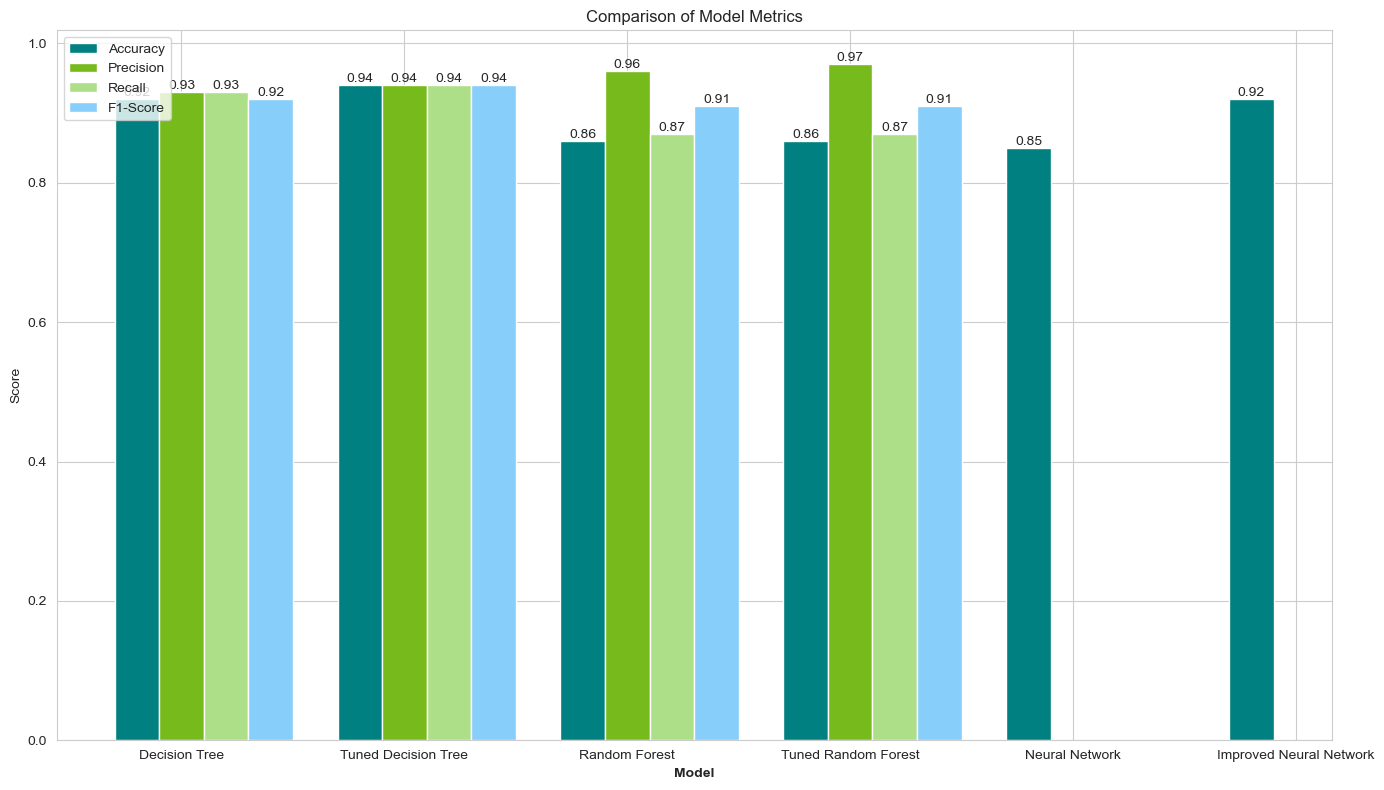

In [47]:
# Model names
models = ['Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest', 'Neural Network', 'Improved Neural Network']

# Metric scores for each model 
accuracies = [0.92, 0.94, 0.86, 0.86, 0.85, 0.92]
precisions = [0.93, 0.94, 0.96, 0.97, np.nan, np.nan]
recalls = [0.93, 0.94, 0.87, 0.87, np.nan, np.nan]
f1_scores = [0.92, 0.94, 0.91, 0.91, np.nan, np.nan]

# Positions of bars on x-axis
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Creating the bars
plt.figure(figsize=(14, 8))
bars1 = plt.bar(r1, accuracies, color='teal', width=barWidth, label='Accuracy')
bars2 = plt.bar(r2, precisions, color='#76BA1B', width=barWidth, label='Precision')
bars3 = plt.bar(r3, recalls, color='#ACDF87', width=barWidth, label='Recall')
bars4 = plt.bar(r4, f1_scores, color='#87CEFA', width=barWidth, label='F1-Score')

# Adding data labels above the bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adding the aesthetics
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Adding the legend and showing the plot
plt.legend()
plt.tight_layout()
plt.show()


The 'Tuned Decision Tree' model stands out with the highest accuracy, indicating superior performance in correctly classifying patients obesity types. The hyperparameter tuning process, has significantly enhanced the model's predictive accuracy compared to the base 'Decision Tree' and the other models presented, including 'Random Forest' and 'Neural Network' variations. Therefore, if we were to make a decision on which model to use in predicting obesity, if accuracy is the primary concern, the 'Tuned Decision Tree' would be the recommended model. However, it is essential to also consider the context in which the model will be deployed and the importance of other performance metrics which might be critical for different scenarios, such as the cost of false positives or false negatives.

## Conclusion

Assessing obesity risk is a crucial task for health care providers and policymakers. Utilizing various machine learning techniques, including Decision Trees, Random Forest, and Neural Networks, practitioners can discern complex patterns and pinpoint risk factors for obesity.

The findings of this study underscore the utility of properly processed categorical data in neural networks and the importance of efficient use of computational resources. The neural network implemented showed promise with high accuracy and included techniques to mitigate overfitting, yet it didn't quite match the performance of the tuned Decision Tree. The Decision Tree's superior performance might be attributed to its fine-tuned structure, which may have captured the data's intricacies more effectively than the neural network, or it may simply be that decision trees are better suited to the structure of this particular data

In essence, while the neural network provided valuable insights and demonstrated strong predictive power, the tuned Decision Tree emerged as the more accurate model for this specific obesity prediction task. This situation highlights the fact that the effectiveness of machine learning models can vary with the context and the specific challenges of the dataset at hand. The use of neural networks in forecasting obesity illustrates their potential to inform and refine health interventions, responding dynamically to changing obesity patterns and enhancing alignment with patient care objectives. 

# Reference

Obesity and overweight (no date) World Health Organization. Available at: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight (Accessed:02 April 2024). 

ChatGPT Version 4, moderately.

## Link to dataset

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
